
# **Introduction to PyTorch**

### **1. Import our libaries and modules**

We import PyTorch by importing ```torch```. We'll be using **torchvision** which is a PyTorch package that consists of popular datasets, model acrhitectures and common image transformations.

In [15]:
import torch
import torchvision
import torchvision.transforms as transformer
import torch.optim as optim
import torch.nn as nn

print(f"GPU available : %s" % torch.cuda.is_available())

GPU available : False


#### If GPU is available set device = ```'cuda'``` if not set device = ```'cpu'```

In [16]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

### **2. We define our transformer**

Transfomers are needed to cast the image data into the required format for input into our model.

- It's composed using the ```transforms.Compose``` function
- We chain the commands or instructions for our pipeline as the arguements
- We use ```transforms.ToTensor()``` to convert the image data into a PyTorch Tensor
- We use ```transforms.Normalize()``` to normalize our pixel values
- By passing the input as ```(0.5, ), (0.5,)``` we Normalize our image data between -1 and +1 
- Note for RGB images we use ```transformed.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))``` instead

**NOTE**:
Our raw pixel values in our MNIST dataset range from 0 to 255. Each image is 28 pixels heigh and 28 pixels wide, with a depth of 1 as it's grayscale.

**Why Normalize?**

1. To ensure all features, or in our case, pixel intensities, are weighted equally when training our CNN
2. Makes training faster as it avoids oscilations during training
3. Removes and bias or skewness in our image data


**Why 0.5?**

Normalization is done like this:

`image = (image - mean) / std`

Using the parameters 0.5,0.5 sets the Mean and STD to 0.5. Using the formula above this gives us:

- Min value = `(0-0.5)/0.5 = 1`
- Max value = `(1-0.5)/0.5 = -1`

For color images we use a tuple of (0.5,0.5,0.5) to set the Mean of the RGB channels to 0.5 and another tuple of (0.5, 0.5, 0.5) to set the STD to 0.5

In [26]:
# Transform to pytorch tensors and the normalize our values between -1 and 1
transform = transformer.Compose([transformer.Resize(28),
                                transformer.RandAugment(2,14),
                                transformer.RandomAffine(degrees=10, scale=(.9, 1.1), shear=0),
                                transformer.ToTensor(),
                                transformer.Normalize((0.5, ), (0.5, ))])

### **3. Fetch our MNIST Dataset using torchvision**

**NOTE** 

- Many online tutorials state transforms are applied upon loading. That is NOT true. Transformers are only applied when loaded by our Data Loader. 
- Our dataset is left unchanged, only batches of images loaded by the our Data Loader are copied and transformed every iteration.
- View other datasets that can be accesed via torchvision here - https://pytorch.org/vision/stable/datasets.html

In [34]:
# Load out Training data and specift what transform to use when loading
trainset = torchvision.datasets.MNIST("mnist",
                                     train = True,
                                     download = True,
                                     transform = transform)

# Load out Training data and specift what transform to use when loading
testset = torchvision.datasets.MNIST("mnist",
                                     train = False,
                                     download = True,
                                     transform = transform)

### **About Training and Test Data**

There are two subsets of the data being used here:

- **Training data** Data that is used to optimize model parameters (used during training)
- **Test/Validation data** Data that is used to evaluate the model performance 

During training, we monitor model performance on the test data.

**Good Machine Learning Practice**

Often we keep another **test set** for testing the final model in order to get an unbiased estimate of *out of sample* accuracy. 

However, MNIST doesn't have a separate test set. Therefore, we use the test set for both validation and test. 


### **4. Let's inpsect a sample of our training data**




Let's inspect our training and test dataset dimensions.

In [102]:
# We have 60000 image samples for our training data & 10000 for our test data
# each 28x28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(trainset.data.shape)
print(testset.data.shape)
print(trainset)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0

#### **Let's look at the an Individual Sample of Data**

You will see that our data has not yet been normalized between -1 and 1.

In [107]:
print(trainset.data[0].shape)
print(trainset.train_labels[0])
print(trainset.data[0])

torch.Size([28, 28])
tensor(5)
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,  

### **Can we plot this in OpenCV?**

Yes we can, but we'll need to convert our tensor to a numpy array. Fortunately. that's quite easy.

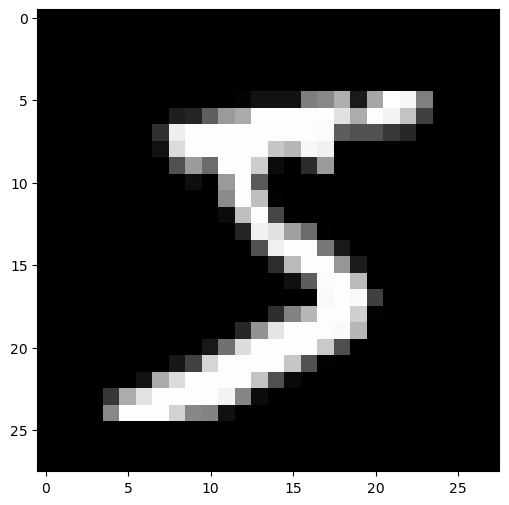

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Define our imshow function
def imgshow(image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(image , cmap="gray")
    plt.show()
image = trainset.data[0].numpy()
imgshow(image)

### **Alternatively we can use matplotlib to show many examples from our dataset**

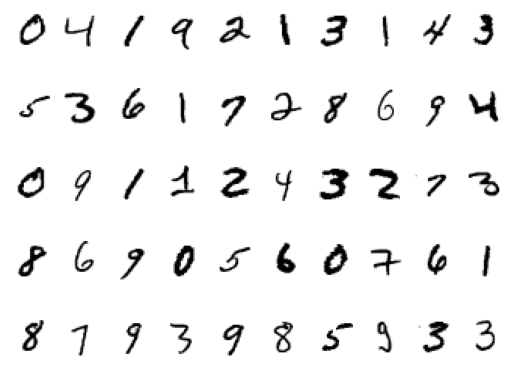

In [96]:
# Let's view the 50 first images of the MNISTtraining dataset

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5,10, index)
    plt.axis("off")
    plt.imshow(trainset.data[index], cmap = "gray_r")

### **5. Create our Data Loader**

A **Data Loader** is a function that we'll use to grab our data in specified batch sizes (we'll use 128) during training. 

Remember we can't feed all our data through the network at once, therefore that is why we split data into batches. 

We set **shuffle** equal to True to prevent data sequence bias. For example, in some datasets the each class in usually in order, so to avoid loading batches of only a single class, we shuffle our data.

```num_workers``` specifies how many CPU cores we wish to utilize, setting it 0 means that it will be the main process that will do the data loading when needed. Leave it as 0 unless you wish to experiment futher.

In [109]:
# Prepare train and test loader
train_loader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 64,
                                          shuffle = True,
                                          num_workers = 2)

test_loader = torch.utils.data.DataLoader(testset,
                                         batch_size = 64,
                                         shuffle = False,
                                         num_workers = 2)

#### **Using Iter and Next() for load batches**


In [111]:
# We use the python function iter to return an iterator for our train_loader object

data_iter = iter(train_loader)

# We use next to get the first batch of data from our iterator
images, labels = next(data_iter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [195]:
images[1].shape

torch.Size([1, 28, 28])

### **Alterantively PyTorch provides it's own Image Plotting Tool**

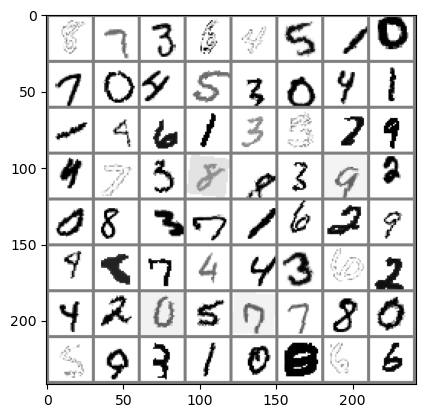

8736451070453041146133794738839208371629487443624205778059310866


In [210]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def img1show(img):
    npimg = img.numpy()[0]
    plt.imshow(npimg, cmap= "gray_r")
    plt.show()

# get some radom training images
dataiter = iter(train_loader)
images, labels = next(data_iter)

# show images
img1show(torchvision.utils.make_grid(images))

print(''.join("%ls" % labels[j].numpy() for j in range(64)))

# **6. Now we build our Model**

We will use the ```nn.Sequential``` method to construct our model. Alernatively we can use the functional module, however this is simpler and more similar to styles you'll work with in Keras.

### **Building a Convolution Filter Layer**

```
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1, 
          padding=1)
```

- **in_channels (int)** — This is the number of channels in the input image (for grayscale images use 1 and for RGB color images use 3)
- **out_channels (int)** — This is the number of channels produced by the convolution. We use 32 channels or 32 filters. **NOTE** 32 will be the number of **in_channels** in the next network layer.
- **kernel_size (int or tuple)** — This is the size of the convolving kernel. We use 3 here, which gives a kernel size of 3 x 3.
- **stride (int or tuple, optional)** — Stride of the convolution. (Default: 1)
- **padding (int or tuple, optional)** — Zero-padding added to both sides of the input (Default: 0). We use a padding = 1.

### **The Max Pool Layer**

- Each pooling layer i.e., nn.MaxPool2d(2, 2) halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes.


**What is torch.nn.functional?**

Generally imported into the namespace F by convention, this module contains all the functions in the torch.nn library (whereas other parts of the library contain classes). As well as a wide range of loss and activation functions, you’ll also find here some convenient functions for creating neural nets, such as pooling functions. (There are also functions for doing convolutions, linear layers, etc, but as we’ll see, these are usually better handled using other parts of the library.)

In [213]:
import torch.nn as nn
import torch.nn.functional as F

# Create our model using a python class
class Net(nn.Module):
    def __init__(self):
        # super is a subclass of the nn.Module and inherits all its methods
        super(Net, self).__init__()

        # We define our layer object here
        # Our first CNN Layer using 32 Filters of 3x3 size, with stride of 1 & padding of 0
        self.conv1 = nn. Conv2d(1, 32, 3)
        # Our second CNN Layer using 64 Filters of 3x3 size with stride of 1 & padding of 0
        self.conv2 = nn.Conv2d(32, 64, 3)
        # Our Max pool layer 2 x 2 kernel of stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # Our first Fully Connected Layer (Called Linear), takes the output of the Max Pool
        # Which is 12 x 12 x 64 and connects it to a set of 128 nodes
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        # Our second Fully Connected Layer, connects the 128 nodes to 10 output nodes (our classes)
        self.fc2 = nn.Linear(128, 10)

    def forward_prob(self, x):
        #  here we define our forward propogation sequence
        # Remember it's Conv1 - Relu - Conv2 - Relu - Max Poll - Flatten - FC1 - FC2
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*12*12) # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model and move it (memory and operations) to the CUDA device
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### **Printing out our Model**

### **7. Defining a Loss Function and Optimizer**

We need to define what type of loss we'll be using and what method will be using to update the gradients.
1. We use Cross Entropy Loss as it is a multi-class problem
2. We use Stochastic Gradient Descent (SGD) - we also specify a learn rate (LR) of 0.001 and momentum 0.9

### **8. Training Our Model**


## **9. Saving Our Model**

We use the ```torch.save()``` function to save our model.

```net.state_dict()``` saves our model weights in a dictionay format.

### **Let's look at some images from your Test Data and view their Ground Truth labels**

### **Let's reload the model we just saved**

#### **Getting Predictions**

Note when working with tensors on the GPU, we have to convert it back to a numpy array to perform python operations on it.

```your_tensor.cpu().numpy()```

#### **Showing our Test Accuracy again**

## **10. Plotting our Training Logs**

Remember we created some lists to log our training stats?

```
# Create some empty arrays to store logs 
epoch_log = []
loss_log = []
accuracy_log = []
```

**Let's now plot those logs**